In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from string import printable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
from patsy import dmatrices
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [93]:
df= pd.read_csv('/Users/carlosruiz/Desktop/Animal-Shelter-Project/Data/shelter_breed.csv')

In [94]:
df

,Unnamed: 0,level_0,index,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
0,0,0,12,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.74370,Austin,Dachshund Mix,0,1,NaN,32.0,9.0,15.0
1,1,1,14,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.000000,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.000000,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair,0,0,NaN,6.0,8.0,16.0
2,2,2,22,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.000000,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.000000,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.74370,Austin,Labrador Retriever,1,1,Beagle,57.5,19.5,14.5
3,3,3,32,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.000000,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.000000,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.74370,Austin,German Shepherd Mix,0,1,NaN,90.0,26.0,13.0
4,4,4,48,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.000000,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.000000,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Pointer Mix,0,1,NaN,75.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,20576,33249,79647,7 years,A769012,2011-03-29 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2018-04-01 12:36:00,4,2018,2018-04,Sunday,12,1.0,2011,3,2018-04,7 years,A769012,Dog,Chihuahua Shorthair Mix,Tan,Springdale And Govalle in Austin (TX),Normal,Stray,Spayed Female,1,2555,7.000000,"(5.0, 7.5]",2018-03-28 17:48:00,3,2018,2018-03,Wednesday,17,1.0,3 days 18:48:00.000000000,3.783333,Tan,0,NaN,1,0,1,Austin,30.271129,-97.

In [95]:
df.drop(['Unnamed: 0','level_0','index'],axis=1,inplace=True)

In [96]:
df=df[(df['animal_type']== 'Dog')]
df=df[df.outcome_type=='Adoption']

In [97]:
df=df[df.time_in_shelter_days<300]
df

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,color1,has_second_color,color2,is_dog,is_male,is_fixed,found_city,found_lat,found_lon,region,breed1,is_breed2,is_mix,breed2,max_weight,max_height,max_life
0,16 years,A200922,1997-10-03 00:00:00,Foster,Adoption,Neutered Male,5840,16.000000,"(15.0, 17.5]",2013-11-22 09:44:00,11,2013,2013-11,Friday,9,1.0,1997,10,2013-11,16 years,A200922,Dog,Dachshund Mix,Black/Tan,Austin (TX),Normal,Owner Surrender,Neutered Male,1,5840,16.000000,"(15.0, 17.5]",2013-10-03 15:47:00,10,2013,2013-10,Thursday,15,1.0,49 days 17:57:00.000000000,49.747917,Black,1,Tan,1,1,1,Austin,30.271129,-97.74370,Austin,Dachshund Mix,0,1,NaN,32.0,9.0,15.0
1,17 years,A210457,1999-06-01 00:00:00,Foster,Adoption,Neutered Male,6205,17.000000,"(15.0, 17.5]",2016-10-07 12:34:00,10,2016,2016-10,Friday,12,1.0,1999,6,2016-10,17 years,A210457,Dog,Chihuahua Shorthair,Tan/Black,4424 S Mopac #412 in Austin (TX),Aged,Public Assist,Neutered Male,1,6205,17.000000,"(15.0, 17.5]",2016-09-28 12:05:00,9,2016,2016-09,Wednesday,12,1.0,9 days 00:29:00.000000000,9.020139,Tan,1,Black,1,1,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair,0,0,NaN,6.0,8.0,16.0
2,15 years,A226069,2000-06-17 00:00:00,Foster,Adoption,Neutered Male,5475,15.000000,"(12.5, 15.0]",2015-10-29 15:00:00,10,2015,2015-10,Thursday,15,1.0,2000,6,2015-10,15 years,A226069,Dog,Labrador Retriever/Beagle,Sable/White,Wheless Ln And Berkman Dr in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.000000,"(12.5, 15.0]",2015-10-06 12:29:00,10,2015,2015-10,Tuesday,12,1.0,23 days 02:31:00.000000000,23.104861,Sable,1,White,1,1,1,Austin,30.271129,-97.74370,Austin,Labrador Retriever,1,1,Beagle,57.5,19.5,14.5
3,15 years,A249087,2001-01-02 00:00:00,Foster,Adoption,Spayed Female,5475,15.000000,"(12.5, 15.0]",2016-11-15 10:37:00,11,2016,2016-11,Tuesday,10,1.0,2001,1,2016-11,15 years,A249087,Dog,German Shepherd Mix,Black/Brown,E 6Th St And Pedernales in Austin (TX),Normal,Stray,Spayed Female,1,5475,15.000000,"(12.5, 15.0]",2016-08-17 14:05:00,8,2016,2016-08,Wednesday,14,1.0,89 days 20:32:00.000000000,89.855556,Black,1,Brown,1,0,1,Austin,30.271129,-97.74370,Austin,German Shepherd Mix,0,1,NaN,90.0,26.0,13.0
4,11 years,A274546,2002-05-25 00:00:00,NaN,Adoption,Spayed Female,4015,11.000000,"(10.0, 12.5]",2013-11-16 12:24:00,11,2013,2013-11,Saturday,12,1.0,2002,5,2013-11,11 years,A274546,Dog,Pointer Mix,Tricolor,Manchaca And Slaughter in Austin (TX),Normal,Stray,Spayed Female,1,4015,11.000000,"(10.0, 12.5]",2013-11-13 18:16:00,11,2013,2013-11,Wednesday,18,1.0,2 days 18:08:00.000000000,2.755556,Tricolor,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Pointer Mix,0,1,NaN,75.0,28.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20576,7 years,A769012,2011-03-29 00:00:00,NaN,Adoption,Spayed Female,2555,7.000000,"(5.0, 7.5]",2018-04-01 12:36:00,4,2018,2018-04,Sunday,12,1.0,2011,3,2018-04,7 years,A769012,Dog,Chihuahua Shorthair Mix,Tan,Springdale And Govalle in Austin (TX),Normal,Stray,Spayed Female,1,2555,7.000000,"(5.0, 7.5]",2018-03-28 17:48:00,3,2018,2018-03,Wednesday,17,1.0,3 days 18:48:00.000000000,3.783333,Tan,0,NaN,1,0,1,Austin,30.271129,-97.74370,Austin,Chihuahua Shorthair Mix,0,1,NaN,6.0,8.0,16.0
20577,2 months,A769014,2018-01-2

In [98]:
df.date_of_birth=df.date_of_birth.apply(lambda x: x[:10])

In [99]:
df['outcome_datetime']=pd.to_datetime(df['outcome_datetime'])
df['intake_datetime']=pd.to_datetime(df['intake_datetime'])

In [100]:
df['time_in_shelter'] = df['outcome_datetime'] - df['intake_datetime']

In [101]:
df['outcome_month']=df.outcome_datetime.apply(lambda x: str(x)[5:7])
df['outcome_year']=df.outcome_datetime.apply(lambda x: str(x)[:4])
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [102]:
df['outcome_weekday']=df.outcome_datetime.dt.dayofweek

In [103]:
df['intake_month']=df.intake_datetime.apply(lambda x: int(str(x)[5:7]))
df['intake_year']=df.intake_datetime.apply(lambda x: int(str(x)[:4]))
df['animal_id_intake']=df.animal_id_intake.apply(lambda x: int(x[1:]))
df['intake_weekday']=df.intake_datetime.dt.dayofweek

In [116]:
dt=df.intake_month.value_counts()
fig=px.bar(dt, title="Amount of intakes per month",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#a8e6cf'])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#8c9da9',
    xaxis_tickvals=[1,2,3,4,5,6,7,8,9,10,11,12],
    xaxis_ticktext=['January',"February",'March','April','May',"June",'July','August','September',"October",'November','December'],
    )
fig.show()

In [13]:
condition=[
    df['intake_condition'] == 'Aged',
    df['intake_condition'] == 'Ferral',
    df['intake_condition'] == 'Injured',
    df['intake_condition'] == 'Normal',
    df['intake_condition'] == 'Nursing',
    df['intake_condition'] == 'Other',
    df['intake_condition'] == 'Pregnant',
    df['intake_condition'] == 'Sick'
]
choises=[
    1,
    0,
    0,
    1,
    1,
    1,
    1,
    0
]
df['health']=np.select(condition,choises)

In [14]:
def unique_breed_dic (dictionary,column):
    df=dictionary.copy()
    df.reset_index(drop=True,inplace=True)
    
    list_of_breeds=[]
    for i in range(len(df[column])):
        if df[column][i].find('/')==-1:
            list_of_breeds.append([df[column][i]])
        else:
            list_of_breeds.append(df[column][i].split('/'))
        
    list_of_breeds=[val for sublist in list_of_breeds for val in sublist]
    
    dup_list=[]
    uniqe_list=[]


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))


    for i in list_of_breeds:
        dup_list.append(i)
    unique_list=list(set(dup_list))
    final_dic={}
    for company in unique_list:
        final_dic[company]=0

    for company in dup_list:
        final_dic[company]=final_dic[company]+1
    return final_dic

In [15]:
brown=['Brown Brindle','Red','Liver','Brown','Tan','Ruddy','Chocolate','Brown Tiger','Sable']
spotted=["Yellow Brindle",'Blue Merle','Black Tiger','Red Merle', 'Liver Tick','Agouti','Blue Tick','Black Brindle','Fawn','Brown Merle','Red Tick']
mustard=['Buff','Orange','Apricot']
other=['Tricolor','Pink','Blue']
white=['Silver','Cream','White']
black=['Black','Black Smoke','Gray','Blue Tiger']
gold=['Gold','Yellow', 'Blue Cream',]

In [16]:
def color_bin (dfcol):
    for i in range(len(brown)):
        if dfcol[0]== brown[i]:
            return 1

    for i in range(len(spotted)):
        if dfcol[0]== spotted[i]:
            return 2

    for i in range(len(mustard)):
        if dfcol[0]== mustard[i]:
            return 3

    for i in range(len(other)):
        if dfcol[0]== other[i]:
            return 4

    for i in range(len(white)):
        if dfcol[0]== white[i]:
            return 5

    for i in range(len(black)):
        if dfcol[0]== black[i]:
            return 6

    for i in range(len(gold)):
        if dfcol[0]== gold[i]:
            return 7

In [17]:
conditions=[
    (df.intake_type=='Owner Surrender')|(df.intake_type=='Euthanasia Request')
]
choises=[
    1
]

df['was_owned']=np.select(conditions,choises,default=0)

In [32]:
df['color_bin']=df.color.map(lambda x: color_bin(x))

In [33]:
%%time
def season_of_date(date):
    year = str(date.year)
    seasons = {'Spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'Fall': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date.date() in seasons['Spring']:
        return 1
    if date.date() in seasons['Summer']:
        return 2
    if date.date() in seasons['Fall']:
        return 3
    else:
        return 4
df['season'] = df.intake_datetime.map(season_of_date)

AttributeError: 'str' object has no attribute 'year'

In [34]:
df['time_in_shelter']=df.time_in_shelter.apply(lambda x: int(str(x)[:2]))
df['intake_datetime']=df.intake_datetime.apply(lambda x: str(str(x)[:10]))
df['age_upon_intake']=df.age_upon_intake.apply(lambda x: int(x[:2]))
df['age_upon_intake_age_group']=df.age_upon_intake_age_group.apply(lambda x: list(map(float,x.strip('(]').split(','))))
df['color']=df.color.apply(lambda x: x.strip('/').split('/'))
df.age_upon_intake_age_group=df.age_upon_intake_age_group.apply(lambda x: int(sum(x)/2))
df.reset_index(drop=True,inplace=True)

TypeError: 'int' object is not subscriptable

In [35]:
df=pd.get_dummies(df, columns=['intake_month'])

KeyError: "None of [Index(['intake_month'], dtype='object')] are in the [columns]"

In [36]:
data=df.intake_weekday.value_counts()
fig=px.bar(data, title="Amount of intakes per Weekday",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#FF847C'])
fig.update_layout(
    xaxis_tickfont_size=14,
    xaxis_tickmode='array',
    xaxis_tickvals=[0,1,2,3,4,5,6],
    xaxis_ticktext=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    showlegend=False,
    plot_bgcolor = '#6C5B7B',
    )

fig.show()

In [37]:
data=df.outcome_weekday.value_counts()
fig=px.bar(data, title="Amount of adoptions per Weekday",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['lightblue'])
fig.update_layout(
    xaxis_tickfont_size=14,
    xaxis_tickmode='array',
    xaxis_tickvals=[0,1,2,3,4,5,6],
    xaxis_ticktext=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],
    showlegend=False,
    plot_bgcolor = '#6C5B7B'
    )

fig.show()

In [38]:
data=df.season.value_counts()
fig=px.bar(data, title="Amount of intakes per Season",labels={'index': 'Months','value':'Amounts'},color_discrete_sequence=['#b9A9a9'])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#F9CDAD',
    xaxis_tickvals=[1,2,3,4],
    xaxis_ticktext=['Spring',"Summer",'Fall','Winter'],
    )

fig.show()

In [88]:
data=df.intake_type.value_counts()
fig=px.bar(data, title="Reason for intake",labels={'index': 'Reasons','value':'Amounts'},color_discrete_sequence=['#dec3c3 '])
fig.update_layout(
    showlegend=False,
    plot_bgcolor = '#4d648d',
    )

fig.show()

In [90]:
df.intake_month

AttributeError: 'DataFrame' object has no attribute 'intake_month'

In [39]:
features=[   'dob_year', 'dob_month',
       'age_upon_intake', 'animal_id_intake',
       'count', 'age_upon_intake_days', 'age_upon_intake_tears',
       'age_upon_intake_age_group', 'intake_year', 'intake_weekday', 'intake_hour', 'intake_number',
       'time_in_shelter', 'time_in_shelter_days', 'has_second_color', 'is_dog', 'is_male', 'is_fixed', 'found_lat',
       'found_lon', 'is_breed2', 'is_mix', 
       'max_weight', 'max_height', 'max_life', 'health', 'color_bin',
       'was_owned', 'season', 'intake_month_1', 'intake_month_2',
       'intake_month_3', 'intake_month_4', 'intake_month_5', 'intake_month_6',
       'intake_month_7', 'intake_month_8', 'intake_month_9', 'intake_month_10',
       'intake_month_11', 'intake_month_12']

In [40]:
featurelist='+'.join(features)
featurelist

'dob_year+dob_month+age_upon_intake+animal_id_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+time_in_shelter+time_in_shelter_days+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12'

In [41]:
df[features].dtypes

dob_year                       int64
dob_month                      int64
age_upon_intake                int64
animal_id_intake               int64
count                          int64
age_upon_intake_days           int64
age_upon_intake_tears        float64
age_upon_intake_age_group      int64
intake_year                    int64
intake_weekday                 int64
intake_hour                    int64
intake_number                float64
time_in_shelter                int64
time_in_shelter_days         float64
has_second_color               int64
is_dog                         int64
is_male                        int64
is_fixed                       int64
found_lat                    float64
found_lon                    float64
is_breed2                      int64
is_mix                         int64
max_weight                   float64
max_height                   float64
max_life                     float64
health                         int64
color_bin                      int64
w

In [42]:
df[features].corr()

,dob_year,dob_month,age_upon_intake,animal_id_intake,count,age_upon_intake_days,age_upon_intake_tears,age_upon_intake_age_group,intake_year,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,has_second_color,is_dog,is_male,is_fixed,found_lat,found_lon,is_breed2,is_mix,max_weight,max_height,max_life,health,color_bin,was_owned,season,intake_month_1,intake_month_2,intake_month_3,intake_month_4,intake_month_5,intake_month_6,intake_month_7,intake_month_8,intake_month_9,intake_month_10,intake_month_11,intake_month_12
dob_year,1.000000,-0.087577,-0.437901,0.593848,NaN,-0.868105,-0.868105,-0.820347,0.469682,-0.010128,-0.010781,-0.032566,-0.124379,-0.177873,0.057978,NaN,-0.016541,-0.007942,-0.046791,-0.046203,-0.033838,0.097415,0.124672,0.130283,-0.103694,0.020955,-0.008978,-0.120987,-0.003581,0.024928,0.012481,0.035477,-0.008779,0.003875,-0.001246,0.013606,0.016763,0.006718,-0.036922,-0.033505,-0.033588
dob_month,-0.087577,1.000000,-0.028128,0.012006,NaN,-0.026497,-0.026497,-0.022211,-0.097064,-0.004635,0.016835,0.006986,-0.008839,-0.015525,0.024687,NaN,-0.008152,0.007147,-0.007343,-0.007312,-0.003192,0.010722,0.012269,0.014146,0.000193,0.000918,-0.003738,-0.010213,0.050764,-0.175852,-0.102517,-0.152715,-0.101091,-0.083350,-0.036969,-0.033933,0.015685,0.073411,0.140519,0.187661,0.270855
age_upon_intake,-0.437901,-0.028128,1.000000,-0.152944,NaN,0.514173,0.514173,0.564663,0.003737,-0.002731,0.005868,-0.003936,-0.011329,0.031198,-0.020847,NaN,-0.009308,-0.013123,0.023178,0.023012,-0.011551,-0.056877,-0.030772,-0.023387,0.028239,-0.004294,0.023758,0.105179,0.026688,-0.002147,0.021595,-0.023725,-0.006680,-0.012044,-0.011610,-0.003772,-0.001835,0.019199,0.022343,0.010961,-0.012254
animal_id_intake,0.593848,0.012006,-0.152944,1.000000,NaN,-0.262284,-0.262284,-0.263608,0.717761,-0.001087,-0.025556,-0.024242,-0.093379,-0.123188,0.005519,NaN,0.004882,-0.042540,-0.021683,-0.021572,-0.115697,0.062213,0.039345,0.031266,-0.030412,0.007425,0.006852,-0.068193,0.006129,0.012098,0.004898,0.021046,-0.030073,-0.008742,0.000444,0.014220,0.022992,0.036356,-0.038813,-0.013576,-0.019484
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age_upon_intake_days,-0.868105,-0.026497,0.514173,-0.262284,NaN,1.000000,1.000000,0.947687,0.007509,0.011554,-0.010211,0.019228,0.101166,0.161278,-0.060282,NaN,0.022509,-0.014473,0.047593,0.046889,-0.043255,-0.102756,-0.114205,-0.125801,0.097103,-0.014564,0.015963,0.153936,0.008565,0.004885,0.007943,-0.008699,-0.000458,0.000529,0.002752,-0.008293,-0.001601,0.008449,-0.003666,0.002669,-0.004542
age_upon_intake_tears,-0.868105,-0.026497,0.514173,-0.262284,NaN,1.000000,1.000000,0.947687,0.007509,0.011554,-0.010211,0.019228,0.101166,0.161278,-0.060282,NaN,0.022509,-0.014473,0.047593,0.046889,-0.043255,-0.102756,-0.114205,-0.125801,0.097103,-0.014564,0.015963,0.153936,0.008565,0.004885,0.007943,-0.008699,-0.000458,0.000529,0.002752,-0.008293,-0.001601,0.008449,-0.003666,0.002669,-0.004542
age_upon_intake_age_group,-0.820347,-0.022211,0.564663,-0.263608,NaN,0.947687,0.947687,1.000000,0.011429,0.006952,-0.012952,0.001412,0.081050,0.134220,-0.056237,NaN,0.007588,-0.025181,0.033067,0.032505,-0.034742,-0.091303,-0.095622,-0.105664,0.081317,-0.010414,0.022054,0.149967,0.001105,-0.001187,0.006524,-0.009967,-0.000284,0.007771,0.004816,-0.005170,0.001887,0.007994,-0.002690,-0.001816,-0.007062
intake_year,0.469682,-0.097064,0.003737,0.717761,NaN,0.007509,0.007509,0.011429,1.000000,0.002032,-0.040956,-0.026737,-0.073566,-0.068618,0.015411,NaN,0.005338,-0.032921,-0.013799,-0.013785,-0.137435,0.013279,0.063012,0.054445,-0.046338,0.020309,0.005672,0.053542,0.041131,0.128036,0.104994,0.092006,0.003754,0.017037,0.002558,-0.004412,0.005230,-0.000601,-0.120949,-0.108470,-0.126850
intake_weekday,-0.010128,-0.004635,-0.002731,-0.001087,NaN,0.011554,0.011554,0.006952,0.002032,1.000000,-0.046490,-0.007440,0.

In [43]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

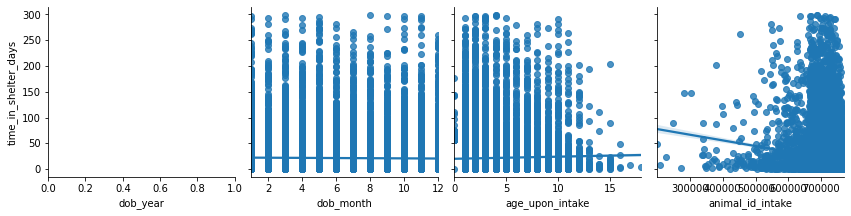

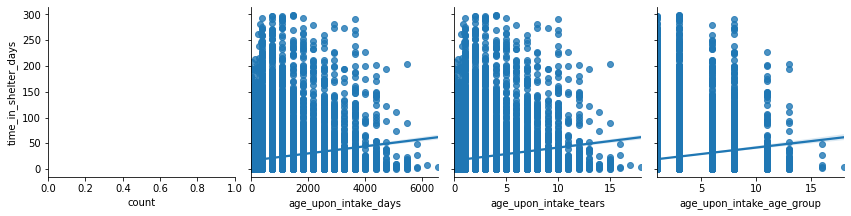

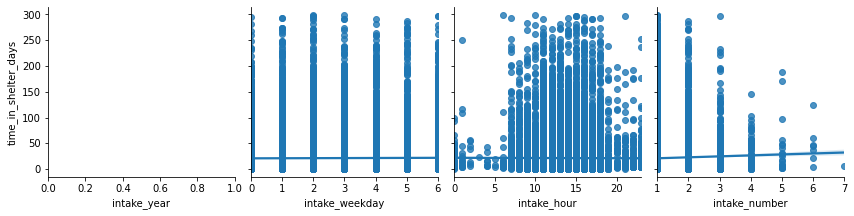

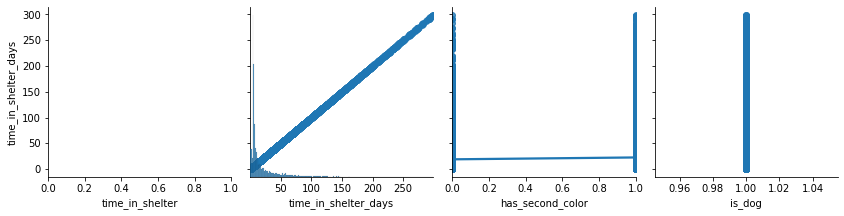

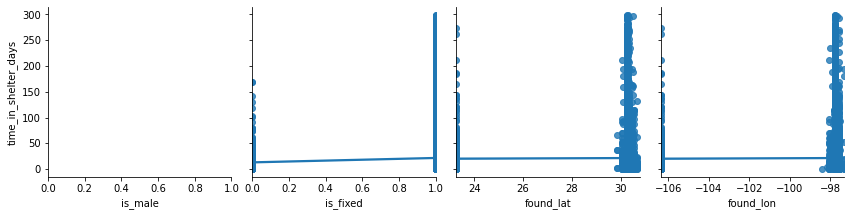

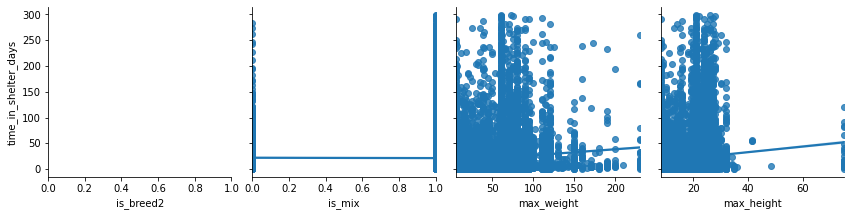

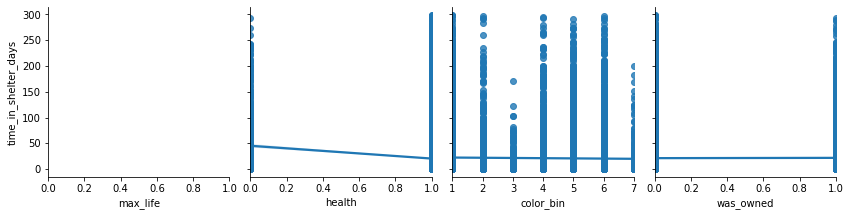

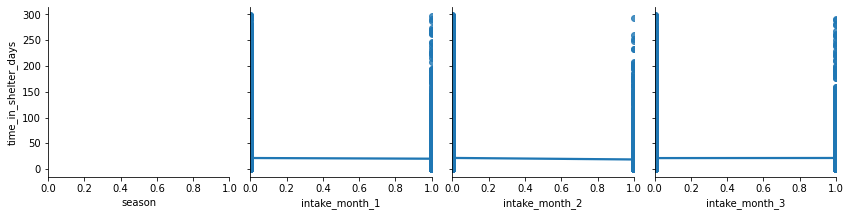

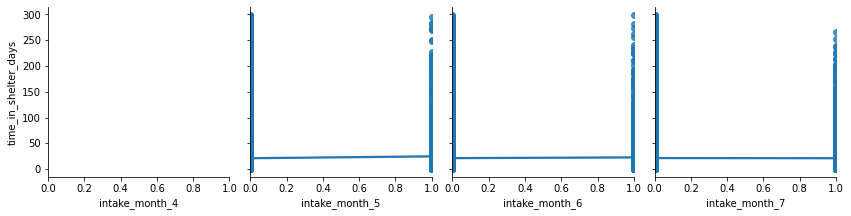

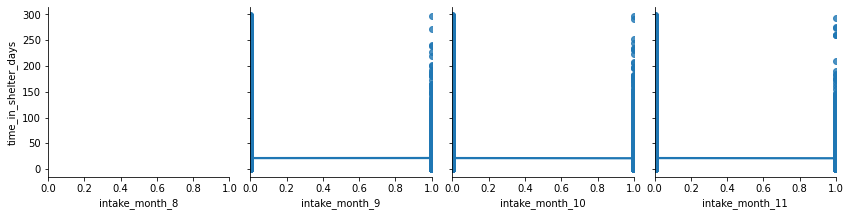

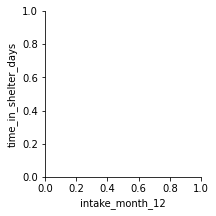

In [44]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['time_in_shelter_days'],x_vars=i, kind="reg", height=3)

In [62]:
lr_model = ols(formula='time_in_shelter_days~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     time_in_shelter_days   R-squared:                       0.087
Model:                              OLS   Adj. R-squared:                  0.086
Method:                   Least Squares   F-statistic:                     56.40
Date:                  Sat, 12 Sep 2020   Prob (F-statistic):               0.00
Time:                          20:04:13   Log-Likelihood:                -99382.
No. Observations:                 20072   AIC:                         1.988e+05
Df Residuals:                     20037   BIC:                         1.991e+05
Df Model:                            34                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1818.7363    225.163      8.077      0.000    1377.399    2260.073
dob_year                     -7.5134      1.194     -6.294      0.000      -9.853      -5.173
dob_month                    -0.7354      0.125     -5.860      0.000      -0.981      -0.489
age_upon_intake              -0.7317      0.107     -6.807      0.000      -0.942      -0.521
count                      1818.7363    225.163      8.077      0.000    1377.399    2260.073
age_upon_intake_days         -0.0061      0.003     -1.748      0.080      -0.013       0.001
age_upon_intake_tears     -1.661e-05    9.5e-06     -1.748      0.080   -3.52e-05    2.02e-06
age_upon_intake_age_group    -2.6504      0.412     -6.431      0.000      -3.458      -1.843
intake_year                   5.3550      1.211      4.423      0.000       2.982       7.728
intake_weekday                0.1019      0.123      0.831      0.406      -0.138       0.342
intake_hour                   0.0575      0.083      0.688      0.491      -0.106       0.221
intake_number                 0.1625      0.479      0.339      0.734      -0.776       1.101
has_second_color              4.0710      0.517      7.872      0.000       3.057       5.085
is_dog                     1818.7363    225.163      8.077      0.000    1377.399    2260.073
is_male                      -0.2041      0.485     -0.420      0.674      -1.156       0.747
is_fixed                      9.6878      1.496      6.475      0.000       6.755      12.620
found_lat                   -11.5233      5.261     -2.190      0.029     -21.835      -1.212
found_lon                     9.2252      4.263      2.164      0.030       0.869      17.582
is_breed2                    -1.7260      0.642     -2.688      0.007      -2.985      -0.467
is_mix                        2.7141      1.121      2.420      0.016       0.516       4.912
max_weight                    0.0954      0.015      6.352      0.000       0.066       0.125
max_height                    0.4504      0.064      7.059      0.000       0.325       0.575
max_life                      0.7901      0.201      3.926      0.000       0.396       1.184
health                      -25.1233      1.264    -19.879      0.000     -27.600     -22.646
color_bin                    -0.5641      0.111     -5.101      0.000      -0.781      -0.347
was_owned                    -1.5601      0.584     -2.670      0.008      -2.706      -0.415
season                        0.8148      0.503      1.620      0.105      -0.171       1.801
intake_month_1              146.1982     18.855      7.754      0.000     109.240     183.156
intake_month_2              145.5660     18.846      7.724      0.000     108.626     182.506
intake_month_3              149.8514     18.837      

In [46]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=16392
Testing data set length=4040


In [129]:
expr = """time_in_shelter~dob_year+dob_month+age_upon_intake+count+age_upon_intake_days+age_upon_intake_tears+age_upon_intake_age_group+intake_year+intake_weekday+intake_hour+intake_number+has_second_color+is_dog+is_male+is_fixed+found_lat+found_lon+is_breed2+is_mix+max_weight+max_height+max_life+health+color_bin+was_owned+season+intake_month_1+intake_month_2+intake_month_3+intake_month_4+intake_month_5+intake_month_6+intake_month_7+intake_month_8+intake_month_9+intake_month_10+intake_month_11+intake_month_12"""

In [130]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [131]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [132]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        time_in_shelter   No. Observations:                16105
Model:                            GLM   Df Residuals:                    16070
Model Family:                 Poisson   Df Model:                           34
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5487e+05
Date:                Sun, 13 Sep 2020   Deviance:                   2.4571e+05
Time:                        14:12:30   Pearson chi2:                 3.43e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [133]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)


            mean   mean_se  mean_ci_lower  mean_ci_upper
4      33.494855  0.495203      32.538202      34.479635
8      25.051595  0.381541      24.314840      25.810675
9      24.921765  0.338847      24.266409      25.594821
15     22.294644  0.278173      21.756048      22.846574
26     35.522562  0.590725      34.383426      36.699437
...          ...       ...            ...            ...
20404  10.394172  0.144086      10.115570      10.680447
20405  11.440132  0.160187      11.130440      11.758441
20412  10.692910  0.150463      10.402038      10.991915
20423  15.310869  0.207867      14.908829      15.723749
20427  11.556183  0.159161      11.248406      11.872383

[3967 rows x 4 columns]


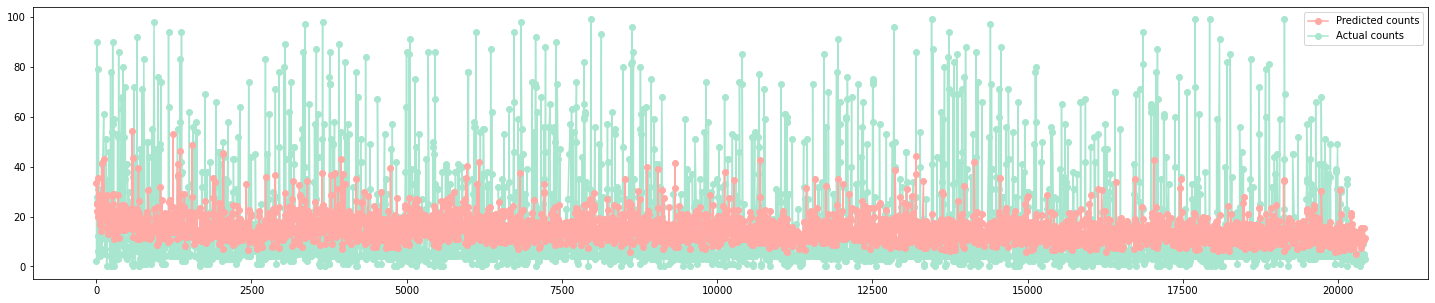

In [135]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['time_in_shelter']
fig = plt.figure(figsize=(25,5))
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts',color='#a8e6cf')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts',color='#ffaaa5')
plt.legend(handles=[predicted, actual])
plt.show()
